In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"victoriaaholu","key":"aed05335bd1c9ad1148c97384251c652"}'}

In [8]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
# Replace with the actual dataset name from Kaggle URL
!kaggle datasets download -d zaheenhamidani/ultimate-spotify-tracks-db

Dataset URL: https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db
License(s): unknown
ultimate-spotify-tracks-db.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
!unzip ultimate-spotify-tracks-db.zip

Archive:  ultimate-spotify-tracks-db.zip
  inflating: SpotifyFeatures.csv     


In [14]:
import pandas as pd

df = pd.read_csv("SpotifyFeatures.csv")
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [17]:
# Map musical key strings to integers
key_mapping = {
    'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5,
    'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11
}

# If 'key' is string, convert it
if df['key'].dtype == 'object':
    df['key'] = df['key'].map(key_mapping)

In [18]:
features = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

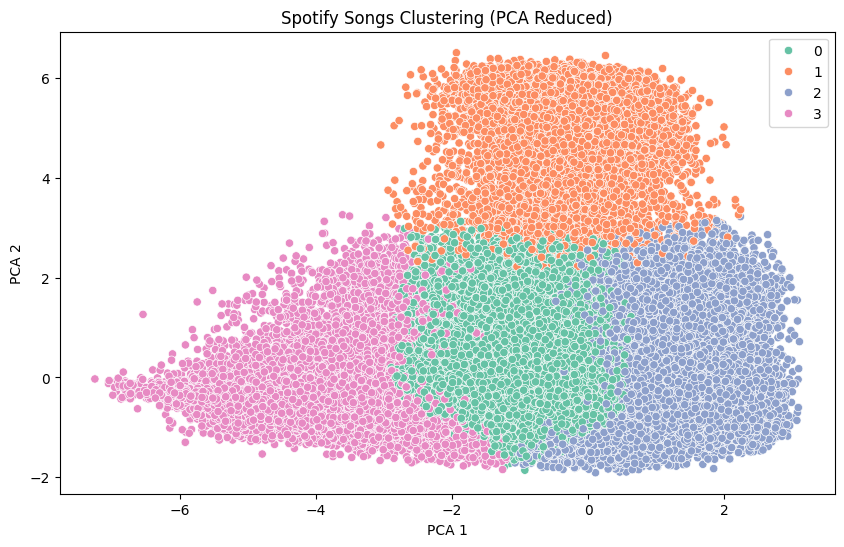

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set2')
plt.title('Spotify Songs Clustering (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [21]:
df.groupby('Cluster')[features].mean()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
Cluster,,,,,,,,,,
0,0.553962,0.389082,5.024380,-10.887067,0.072690,0.594794,0.088330,0.170789,0.387712,113.077862
1,0.561985,0.663494,5.271420,-11.968484,0.873471,0.786222,0.001326,0.729255,0.414364,98.266286
2,0.615700,0.739712,5.370943,-6.205102,0.101268,0.122806,0.067075,0.208868,0.558485,124.732657
3,0.289698,0.161913,4.962038,-20.703773,0.047068,0.855175,0.658693,0.155456,0.151787,102.481648
